Лабораторная работа №1

In [2]:
import pandas as pd 
import scipy
from scipy import stats
import numpy as np
import re
import math
import datetime
import calendar
import matplotlib
from matplotlib import pyplot as plt

Берём данные о погоде в Гусь-Хрустальном с сайта Rp5.ru за 2019 год.

Показатели:

DT - Дата/время

T - Температура

P0 - атмосферное давление на уровне станции

P - атмосферное давление, приведённое к среднему уровню

U - Относительная влажность (%) на высоте 2 метра

DD - направление ветра

Ff - скорость ветра на высоте 10-12 метров, осреднённая за 10мин период

ff10 - максимальное значение порыва ветра на высоте 10-12 метров, за 10мин период

ff3 - максимальное значение порыва ветра на высоте 10-12 метров, за период между сроками

N - общая облачность

WW - текущая погода

W1 - прошедшая погода между сроками наблюдения 1

W2 - прошедшая погода между сроками наблюдения 2

Tn - минимальная температура воздуха за прошедший период (не более 12 часов)

Tx - максимальная температура воздуха за прошедший период (не более 12 часов)

Cl - Солисто-кучевые, кучевые и другие облака

Nh - количество облаков Cl, или Cm при отсутствии Cl облаков

H - ысота основания самых низких облаков

Cm - высококучеые, высокосолистые и прочие облака

Ch - Перистые, перисто-кучевые и прочие облака

VV - горизонтальная дальность видимости

Td - температура точки росы на высоте 2 метра над поерхностью замли

RRR - количество выпавших осадков

tR - период времени за который накопленно указанное количество осадков

E - состояние поверхности почвы

Tg - Минимальная температура поверхности почвы за ночь

E1 - состояние почвы со снегом или измеримым ледяным покровом

sss - высота снежного покрова

Первым делом удаляем лишние столбцы, которыми точно не будет пользоваться.

In [3]:
df=pd.read_csv("gus3.csv", sep=";")
df = df.shift(1,axis=1).reset_index()
df['Местное время в Гусь-Хрустальном'] = df['index']
df.drop('index', axis=1, inplace=True)
df.dropna(axis=1, how='all', inplace=True)
Ddrop = ['ff10','ff3','N','W1','W2','Tn','Tx','E','Tg','sss', 'Cl', 'Nh', 'Cm', 'Ch', 'tR', 'RRR', 'H', 'WW','E1']
for a in Ddrop:
    df.drop(a, axis=1, inplace=True)
df



,Местное время в Гусь-Хрустальном,T,Po,P,Pa,U,DD,Ff,VV,Td
0,31.12.2019 21:00,0.6,732.4,744.9,0.2,94.0,"Ветер, дующий с юго-запада",2.0,4.0,-0.2
1,31.12.2019 18:00,0.5,732.2,744.7,-0.4,92.0,"Ветер, дующий с юго-запада",2.0,10.0,-0.6
2,31.12.2019 15:00,0.7,732.6,745.1,-0.4,91.0,"Ветер, дующий с западо-юго-запада",2.0,10.0,-0.6
3,31.12.2019 12:00,0.7,733.0,745.4,0.0,89.0,"Ветер, дующий с западо-юго-запада",3.0,20.0,-0.9
4,31.12.2019 09:00,0.4,733.0,745.5,-0.2,90.0,"Ветер, дующий с запада",4.0,10.0,-1.1
...,...,...,...,...,...,...,...,...,...,...
2914,01.01.2019 12:00,-8.2,752.4,765.7,-2.2,86.0,"Ветер, дующий с юго-юго-востока",2.0,20.0,-10.1
2915,01.01.2019 09:00,-9.1,754.6,767.9,-0.7,89.0,"Ветер, дующий с юго-юго-востока",2.0,20.0,-10.6
2916,01.01.2019 06:00,-9.3,755.3,768.7,-1.8,89.0,"Ветер, дующий с юго-юго-востока",2.0,20.0,-10.8
2917,01.01.2019 03:00,-11.9,757.1,770.7,-0.2,92.0,"Ветер, дующий с юго-юго-востока",1.0,10.0,-12.9


Переводим направление ветра в "градусы", переименовываем первый столбец

In [4]:
a=[0,22.5,45,67.5,90,112.5,135,157.5,180,202.5,225,247.5,270,292.5,315,337.5,360]
b=['Штиль, безветрие',
'Ветер, дующий с северо-северо-востока',
'Ветер, дующий с северо-востока',
'Ветер, дующий с востоко-северо-востока',
'Ветер, дующий с востока',
'Ветер, дующий с востоко-юго-востока',
'Ветер, дующий с юго-востока',
'Ветер, дующий с юго-юго-востока',
'Ветер, дующий с юга',
'Ветер, дующий с юго-юго-запада',
'Ветер, дующий с юго-запада',
'Ветер, дующий с западо-юго-запада',
'Ветер, дующий с запада',
'Ветер, дующий с западо-северо-запада',
'Ветер, дующий с северо-запада',
'Ветер, дующий с северо-северо-запада',
'Ветер, дующий с севера']
df['DD']=df['DD'].replace(b,a)
df.rename(columns={'Местное время в Гусь-Хрустальном':'DT'},inplace = True)
df

,DT,T,Po,P,Pa,U,DD,Ff,VV,Td
0,31.12.2019 21:00,0.6,732.4,744.9,0.2,94.0,225.0,2.0,4.0,-0.2
1,31.12.2019 18:00,0.5,732.2,744.7,-0.4,92.0,225.0,2.0,10.0,-0.6
2,31.12.2019 15:00,0.7,732.6,745.1,-0.4,91.0,247.5,2.0,10.0,-0.6
3,31.12.2019 12:00,0.7,733.0,745.4,0.0,89.0,247.5,3.0,20.0,-0.9
4,31.12.2019 09:00,0.4,733.0,745.5,-0.2,90.0,270.0,4.0,10.0,-1.1
...,...,...,...,...,...,...,...,...,...,...
2914,01.01.2019 12:00,-8.2,752.4,765.7,-2.2,86.0,157.5,2.0,20.0,-10.1
2915,01.01.2019 09:00,-9.1,754.6,767.9,-0.7,89.0,157.5,2.0,20.0,-10.6
2916,01.01.2019 06:00,-9.3,755.3,768.7,-1.8,89.0,157.5,2.0,20.0,-10.8
2917,01.01.2019 03:00,-11.9,757.1,770.7,-0.2,92.0,157.5,1.0,10.0,-12.9


 Конверитруем строковые даты в формат datetime64 и сортируем таблицу по дате

In [5]:
df['DT'] = pd.to_datetime(df['DT'])
df = df.sort_values(by='DT')
columns = list(df)
columns.remove('DT')
for a in columns:
    df[a].fillna(df[a].groupby([df.DT.dt.year, df.DT.dt.month]).transform('mean'), inplace=True)
df

,DT,T,Po,P,Pa,U,DD,Ff,VV,Td
2918,2019-01-01 00:00:00,-8.7,757.3,770.8,-0.1,88.0,180.0,1.0,20.0,-10.4
2917,2019-01-01 03:00:00,-11.9,757.1,770.7,-0.2,92.0,157.5,1.0,10.0,-12.9
2916,2019-01-01 06:00:00,-9.3,755.3,768.7,-1.8,89.0,157.5,2.0,20.0,-10.8
2915,2019-01-01 09:00:00,-9.1,754.6,767.9,-0.7,89.0,157.5,2.0,20.0,-10.6
2914,2019-01-01 12:00:00,-8.2,752.4,765.7,-2.2,86.0,157.5,2.0,20.0,-10.1
...,...,...,...,...,...,...,...,...,...,...
4,2019-12-31 09:00:00,0.4,733.0,745.5,-0.2,90.0,270.0,4.0,10.0,-1.1
3,2019-12-31 12:00:00,0.7,733.0,745.4,0.0,89.0,247.5,3.0,20.0,-0.9
2,2019-12-31 15:00:00,0.7,732.6,745.1,-0.4,91.0,247.5,2.0,10.0,-0.6
1,2019-12-31 18:00:00,0.5,732.2,744.7,-0.4,92.0,225.0,2.0,10.0,-0.6


Составляем диаграммы температуры по месяцам

Температурные диаграммы по месяцам:


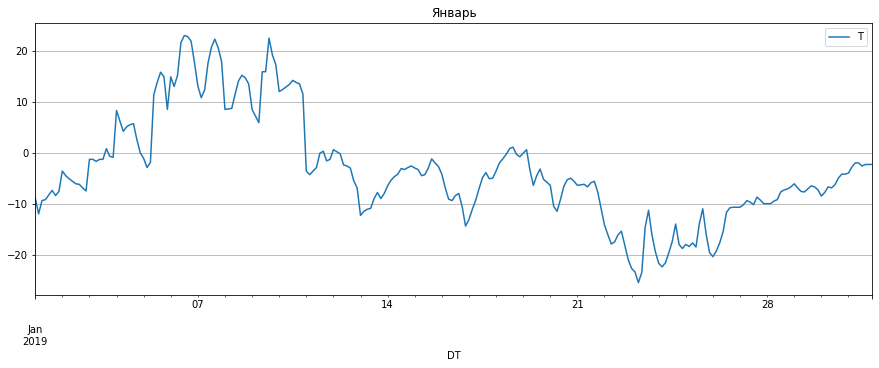

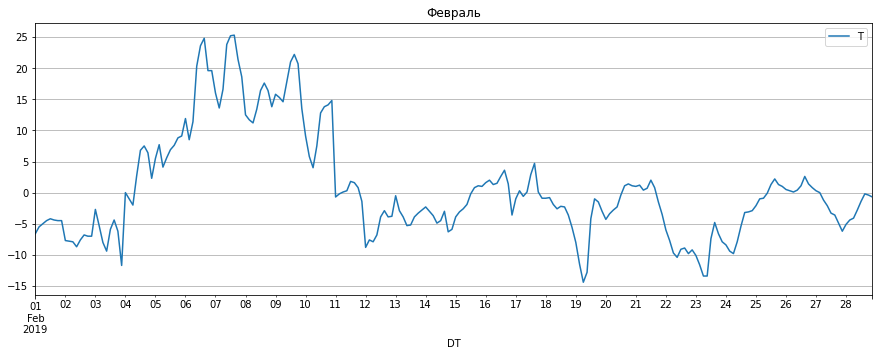

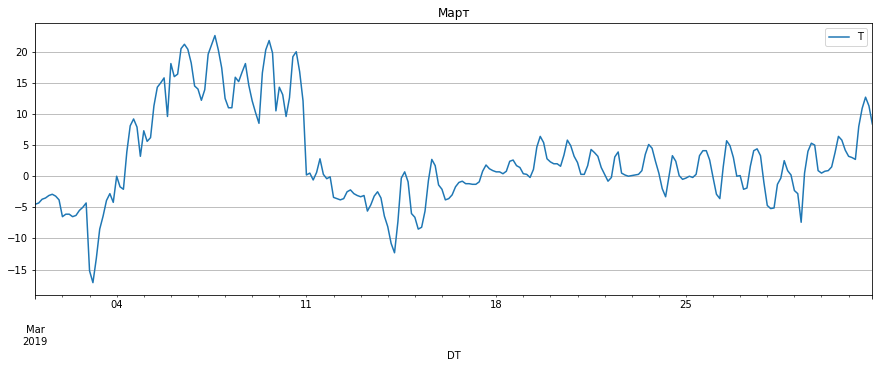

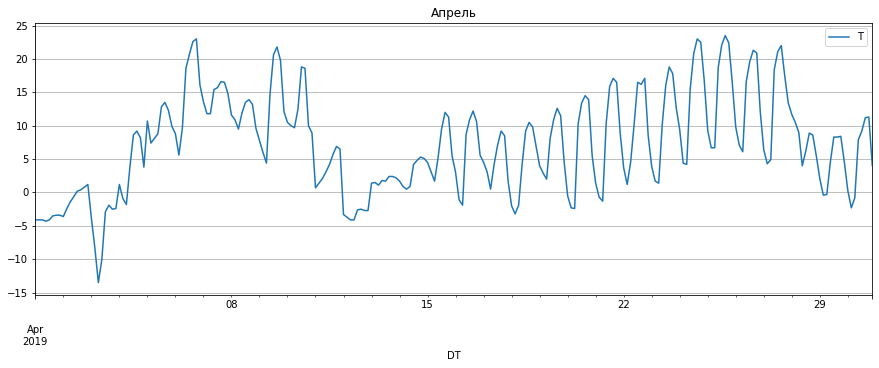

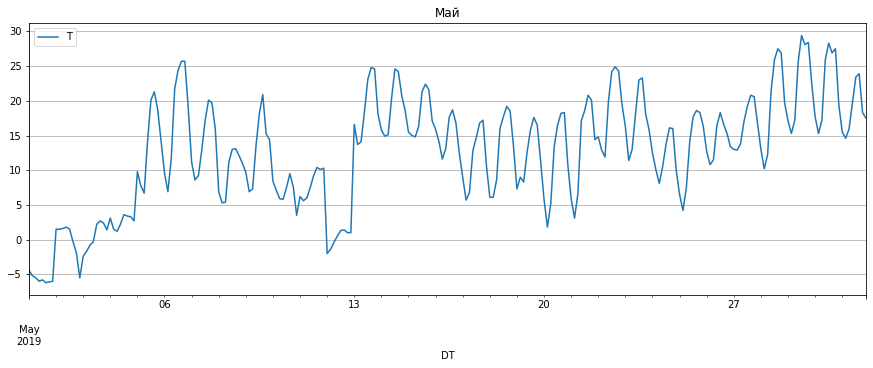

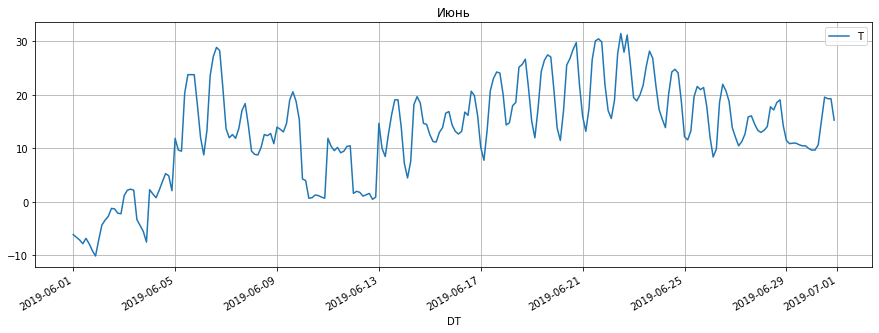

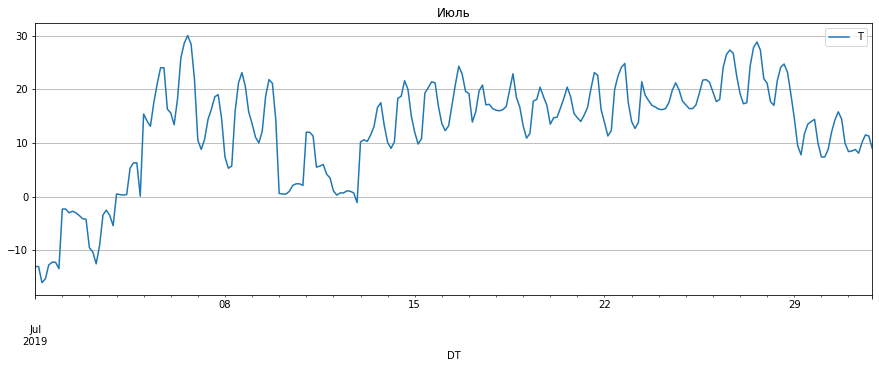

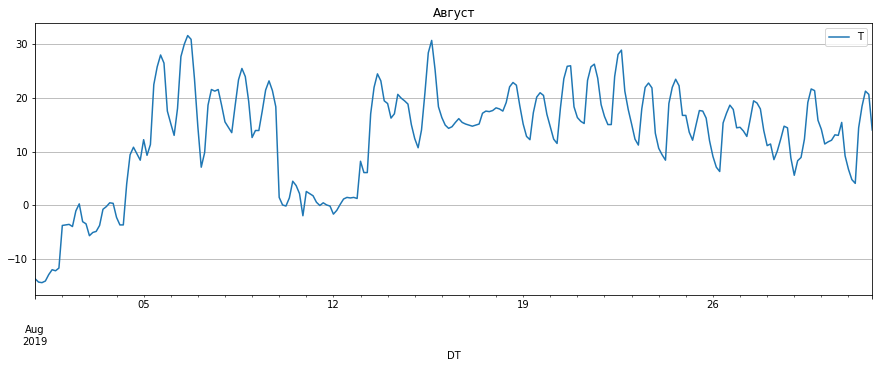

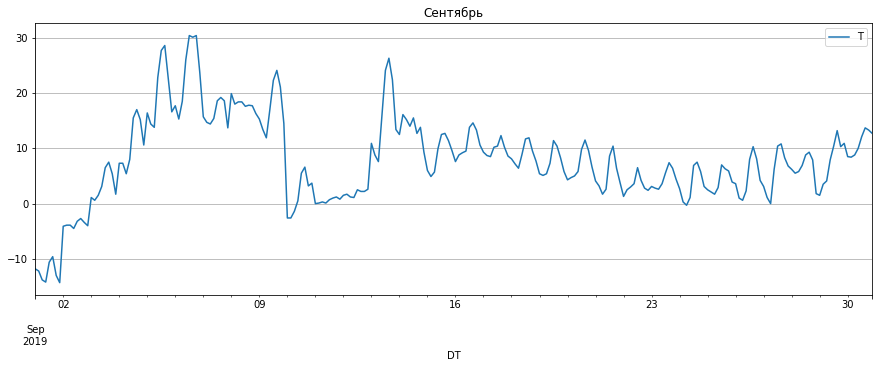

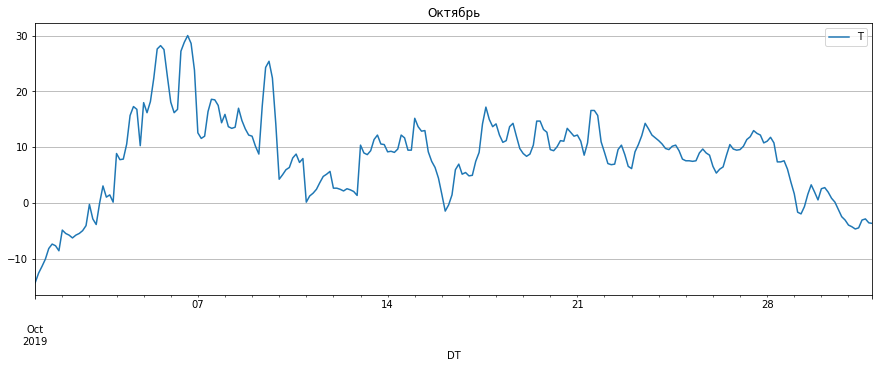

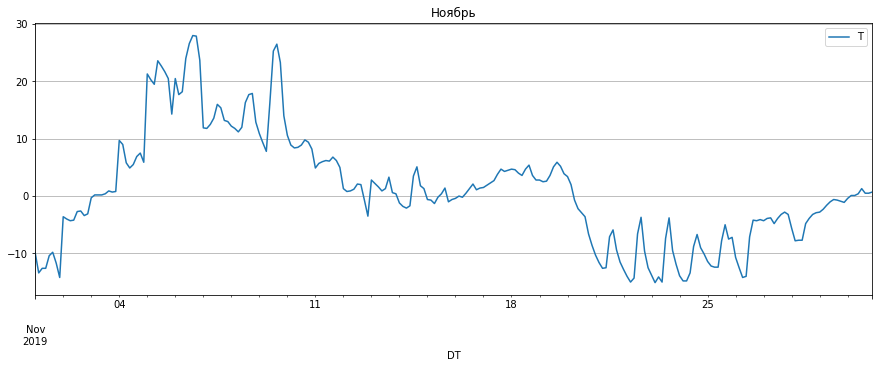

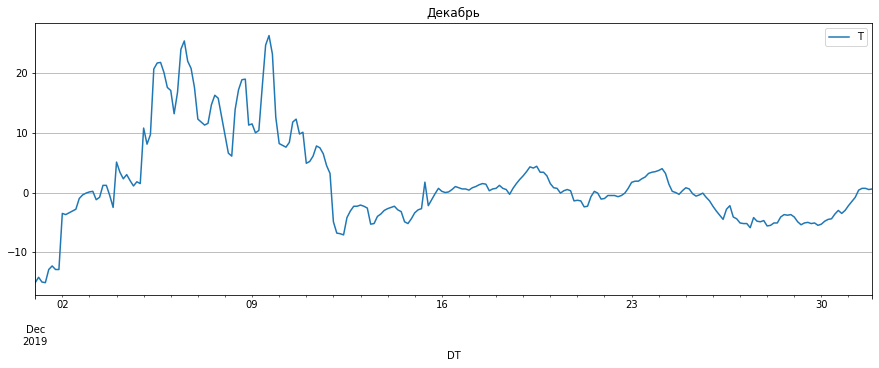

In [15]:
print('Температурные диаграммы по месяцам:')
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Maй', 'Июнь', 
          'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
plot_value = 'T'
for month_ in months: 
    to_plot = df[['DT', plot_value]]
    to_plot = to_plot[to_plot.DT.dt.month == (months.index(month_) + 1)]
    to_plot.plot(title='{}'.format(month_), x='DT', y=plot_value, figsize=(15,5), grid=True)

Далее, на основе данных, считаем среднее арифметическое, дисперсию и среднекввадратичное отклонение температуры. Сравниваем результат, полученный вручную и через функции бибилиотеки numpy.

Формулы расчёта:

$ \bar{X} = \frac{\sum x_i} {N}$ - среднее арифметическое

$ D = \frac{\sum (x_i - \bar{x})^2} {N}$ - дисперсия

$ \sigma = \sqrt{D}$ - cреднеквадратичное отклонение

In [6]:
summ = sum(df['T'])
n = len(df['T'])
mean_byhand = summ/n
print ('Среднее арифметическое, посчитанное вручную:', mean_byhand)
print ('Среднее арифметическое, посчитанное автоматически:', np.mean(df['T']))
summraz=0;
for a in df['T']:
    summraz=summraz+(a-mean_byhand)**2
disp_byhand=summraz/n
print ('Дисперсия, посчитанная вручную:', disp_byhand)
print ('Дисперсия, посчитанная автоматически:', np.var(df['T']))
sco_byhand = pow(disp_byhand, 0.5)
print ('Среднеквадратичное отклонение, посчитанное вручную:', sco_byhand)
print ('Среднеквадратичное отклонение, посчитанное автоматически:', np.std(df['T']))

Среднее арифметическое, посчитанное вручную: 6.516799192225168
Среднее арифметическое, посчитанное автоматически: 6.516799192225168
Дисперсия, посчитанная вручную: 105.51423223494172
Дисперсия, посчитанная автоматически: 105.51423223494172
Среднеквадратичное отклонение, посчитанное вручную: 10.272012083080009
Среднеквадратичное отклонение, посчитанное автоматически: 10.272012083080009


Как видим, значения совпадают. 

Считаем корреляционный коэффициент, вручную и через библиотеку numpy

Формула расчёта:

$ r_{xy} = \frac {\sum (x_i - \bar{x}) * (y_i - \bar{y})} {\sqrt {\sum (x_i - \bar{x})^2 * (y_i - \bar{y})^2}}$ - корреляция

In [7]:
#df.dropna(axis=1, how='all', inplace=True)
#сhis=-0.4845579047576334
#znаm = 1
#for a in df['T']:
 #   for b in df ['Po']:
  #      chis = sum((a-np.mean(a))*(b-np.mean(b)))
   #     znam = math.sqrt(sum(pow((a-np.mean(a)),2)*pow((b-np.mean(b)),2)))


      
#print ('Коэффициент корреляции: 'chis/znam)

In [11]:
print('Автоматическая корреляция: \n') 
df.corr()


Автоматическая корреляция: 



,T,Po,P,Pa,U,DD,Ff,VV,Td
T,1.000000,-0.046462,-0.110498,-0.060749,-0.520202,0.096292,-0.028434,0.216245,0.857689
Po,-0.046462,1.000000,0.997374,0.068271,-0.177621,-0.197211,-0.290498,0.168711,-0.165671
P,-0.110498,0.997374,1.000000,0.067045,-0.144046,-0.202188,-0.288225,0.152942,-0.220636
Pa,-0.060749,0.068271,0.067045,1.000000,0.052099,0.129345,-0.031361,0.066789,-0.018323
U,-0.520202,-0.177621,-0.144046,0.052099,1.000000,-0.219881,-0.202881,-0.488151,-0.019970
DD,0.096292,-0.197211,-0.202188,0.129345,-0.219881,1.000000,0.412688,0.103402,-0.008038
Ff,-0.028434,-0.290498,-0.288225,-0.031361,-0.202881,0.412688,1.000000,-0.021477,-0.146276
VV,0.216245,0.168711,0.152942,0.066789,-0.488151,0.103402,-0.021477,1.000000,0.003196
Td,0.857689,-0.165671,-0.220636,-0.018323,-0.019970,-0.008038,-0.146276,0.003196,1.000000


In [18]:
R = np.corrcoef(df['T'], df['Po'])[0, 1]
print ("Корреляционный коэффициент автоматически", R)

Корреляционный коэффициент автоматически -0.04646167645821249


In [16]:
X1 = np.array(df['T'] - np.mean(df['T']))
Y1 = np.array(df['Po'] - np.mean(df['Po']))
chis = sum(X1*Y1)
X2 = np.array((df['T'] - np.mean(df['T']))**2)
Y2 = np.array((df['Po'] -np.mean(df['Po']))**2)
znam = math.sqrt(sum(X2) * sum(Y2))
corr=сhis/znаm
print('Корреляционный коэффициент вручную', corr)

Корреляционный коэффициент вручную -0.0464616764582124


Как видим, значения совпали. Считаем доверительный интервал. 

Среднее генеральной совокупности, имеющей нормальный закон распределения находится в доверительном интервале:

 $ \bar{x} - z  \sigma / sqrt(n) < \mu < \bar{x} + z  \sigma / sqrt (n) $

In [26]:
mean=np.mean(df['T'])
sco = np.std(df['T'])
n = len(df['T'])
z=1.96 #из таблицы Z оценок
g1=mean-sco*z/math.sqrt(n)
g2=mean+sco*z/math.sqrt(n)
print ('Доверительный интервал, посчитанный вручную:', g1, '< 𝜇 <', g2 )

sk = stats.norm.interval(0.95, loc=mean, scale=sco / math.sqrt(len(df['T'])))
print (sk)

Доверительный интервал, посчитанный вручную: 6.144154838303525 < 𝜇 < 6.889443546146811
(6.1441616857309755, 6.8894366987193605)
